In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=5
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let's analyze this problem step by step. I am given a Hamiltonian for a condensed matter physics system and need to create a Python class for the Hartree-Fock approximation of this system. 

The Hamiltonian has a kinetic term and two interaction terms (Hartree and Fock). Let me break down the meaning of each term:

1. Kinetic term: 
   - $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
   - This is the non-interacting part where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$ describes the energy dispersion
   - $s$ appears to be a spin or orbital index
   - $\bm{k}$ is the momentum vector
   - $\bm{n}$ represents hopping pairs in real space

2. Hartree term:
   - $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
   - This describes density-density interactions
   - $U(0)$ is the on-site interaction streng

In [7]:
print(generated_code['thinking'])

Let's analyze this problem step by step. I am given a Hamiltonian for a condensed matter physics system and need to create a Python class for the Hartree-Fock approximation of this system. 

The Hamiltonian has a kinetic term and two interaction terms (Hartree and Fock). Let me break down the meaning of each term:

1. Kinetic term: 
   - $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
   - This is the non-interacting part where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$ describes the energy dispersion
   - $s$ appears to be a spin or orbital index
   - $\bm{k}$ is the momentum vector
   - $\bm{n}$ represents hopping pairs in real space

2. Hartree term:
   - $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
   - This describes density-density interactions
   - $U(0)$ is the on-site interaction strength
   - The expectation value $\langle c_{k,s}^\dagge

In [8]:
print(generated_code['text'])

# ANSWER:

1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: spin_up, spin_down

2) EXP-VAL DEPENDENT TERMS: {
    r"\langle c_{k,s}^\dagger c_{k,s}\rangle": "Density for spin s at momentum k",
    r"\langle c_{k,s}^\dagger c_{k,s'} \rangle": "Exchange correlation between spins s and s' at momentum k"
}
  
TERMS:
- $-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$ -> H[s, s, k], NI (Non-Interacting)
- $\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$ -> H[s', s', k'], I (Interacting)
- $-\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$ -> H[s', s, q], I (Interacting)

3) CODE:
```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin-1/2 particles on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the Brillo

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Hartree-Fock Hamiltonian for a system with spin-1/2 particles on a triangular lattice.
    
    Args:
        N_shell (int): Number of shells in the Brillouin zone.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={'t_up': 1.0, 't_down': 1.0, 'U_0': 1.0, 'T': 0, 'a': 1.0}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Lattice symmetry
        self.D = (2,)  # Number of flavors (spin up and down)
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin_up, 1: spin_down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # Lattice constant
  

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_5.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

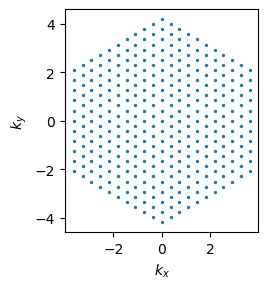

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [19]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [20]:
h_nonint = ham.generate_non_interacting()

In [21]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

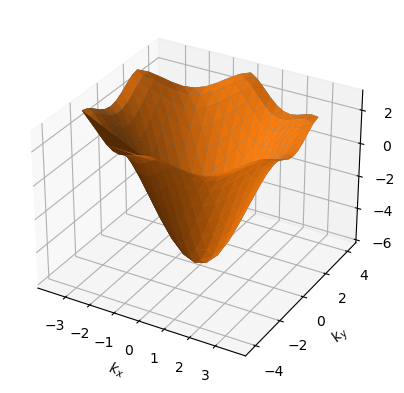

In [22]:
utils_auto.plot_2d_bandstructure(ham,en)

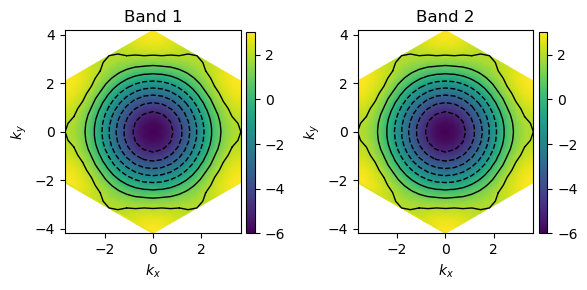

In [23]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [24]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [25]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [26]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


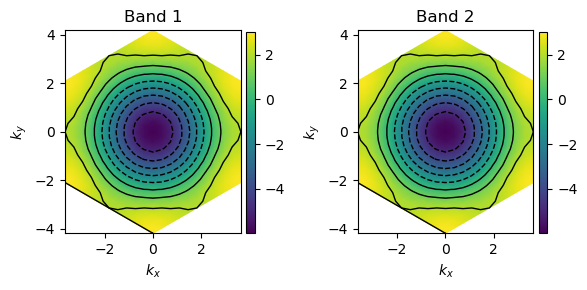

In [27]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [28]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [29]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [30]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 1


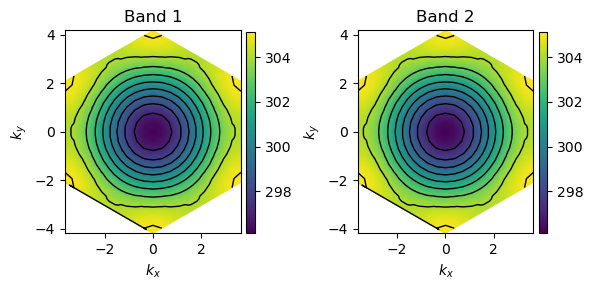

In [31]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [32]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -9.00
U/T is 143.60
mean_U is 151.51


# Auto eval

## Task 1

In [33]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image according to the given problem and rubric.

The image shows a momentum space mesh in the form of a hexagon with points arranged in a regular pattern. The x-axis is labeled k_x and the y-axis is labeled k_y, and the points are distributed in a hexagonal pattern.

From the problem, we're told:
- The system is a triangular lattice
- We need to check the point group symmetry of the momentum space mesh in the first Brillouin zone

For a triangular lattice in real space, the first Brillouin zone in momentum (k) space should be a hexagon. This is exactly what we see in the image - a hexagonal arrangement of points.

Let's check the point group symmetry of this hexagonal mesh:
1. The hexagon has 6-fold rotational symmetry (C6) - it can be rotated by 60° and still look the same
2. It has reflection symmetry across multiple axes
3. It has inversion symmetry (the pattern is symmetric about the origin)

The point group o

In [34]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [35]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric provided.

The image shows two plots labeled "Band 1" and "Band 2", which appear to be false color plots with contour lines showing the band structure in the first Brillouin zone for a triangular lattice system.

Let's go through the rubric point by point:

1. Identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, the Brillouin zone boundary appears to have a hexagonal shape, which is indeed what we expect for a triangular lattice in real space. The hexagonal shape is visible from the yellow regions at the boundaries of the plots. This is correct.

2. Examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
The highest energy regions (yellow) appear to be at the corners of the hexagonal Brillouin zone. This is consistent with the col

In [36]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [37]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image according to the given rubric for evaluating the band structure after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

The image shows two identical plots labeled "Band 1" and "Band 2". Looking at the boundary of the colored region, I can see that it has a hexagonal shape. For a triangular lattice, the first Brillouin zone is indeed hexagonal, so this matches what's expected. This point appears to be correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
Looking at the plots, the highest energy regions (yellow) form an outer ring around the hexagonal boundary.

2.2 Trace the pattern of energy variation across the zone
The energy variation appears to decrease radially 

In [38]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [39]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

I need to analyze the image which shows two band structure plots labeled "Band 1" and "Band 2" for a triangular lattice system calculated using the Hartree-Fock method with a large interaction limit.

Let me go through each point in the rubric systematically:

1. Identify the shape of the Brillouin zone boundary:
   Looking at the plots, I see a hexagonal shape for the Brillouin zone boundary in both Band 1 and Band 2 plots. This is indeed the expected shape for a triangular lattice, where the first Brillouin zone is a regular hexagon. So this appears correct.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): The yellow regions appear at the corners of the hexagon in both bands.
   2.2 Energy variation pattern: Both bands show a concentric pattern from the center (dark purple/lowest energy) to the boundary (yellow/highest energy).
   2.3 Rotational and mirror symmetries: The energy distribut

In [40]:
answer4=utils_auto.extract_result_content(result4['text'])

In [41]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '5' saved to final_answer.yaml
